<a href="https://colab.research.google.com/github/jimm21/redes_neuronales_CIFAR10/blob/main/Image_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAMOS LIBRERIAS

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras import models, layers, optimizers
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt

IMPORTAMOS LA DATA

In [ ]:
# dataset : https://keras.io/api/datasets/cifar10/
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
train_data.shape

(50000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
train_labels[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

VISUALIZANDO LAS IMÁGENES



In [ ]:
# Creando una lista de nombres de las clases
class_names = ['avión', 'automóvil', 'ave', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'tractor']

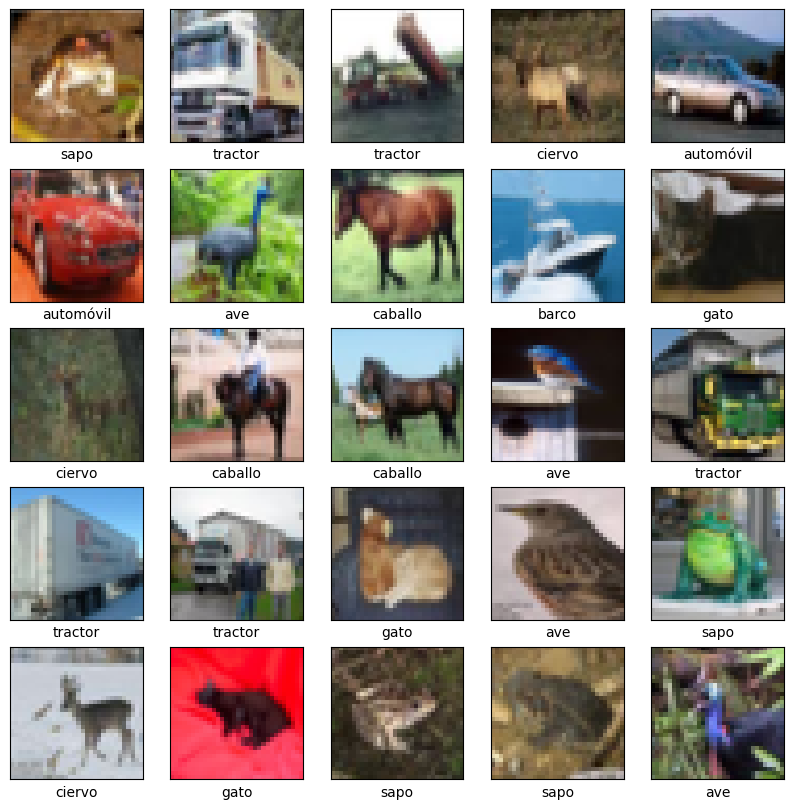

In [ ]:
# Visualizando algunas imágenes en el dataset de entrenamiento
plt.figure(figsize=[10,10])
for i in range (25):    # para las primeras 5 imágenes
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

LIMPIEZA DE DATOS

In [ ]:
x_train = train_data.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
print(train_labels[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


CONTRUCCIÓN DEL MODELO

In [ ]:
model = models.Sequential()
model.add(layers.Dense(516,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,),
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(10,activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 516)               1585668   
                                                                 
 dense_71 (Dense)            (None, 128)               66176     
                                                                 
 dense_72 (Dense)            (None, 64)                8256      
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 dense_74 (Dense)            (None, 10)                330       
                                                                 
Total params: 1662510 (6.34 MB)
Trainable params: 1662510 (6.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ENTRENANDO EL MODELO

In [ ]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/40
88/88 [==============================] - 2s 12ms/step - loss: 2.1885 - accuracy: 0.2331 - val_loss: 2.0433 - val_accuracy: 0.3012
Epoch 2/40
88/88 [==============================] - 1s 9ms/step - loss: 1.9494 - accuracy: 0.3234 - val_loss: 1.8700 - val_accuracy: 0.3602
Epoch 3/40
88/88 [==============================] - 1s 9ms/step - loss: 1.8316 - accuracy: 0.3679 - val_loss: 1.8077 - val_accuracy: 0.3792
Epoch 4/40
88/88 [==============================] - 1s 9ms/step - loss: 1.7620 - accuracy: 0.3934 - val_loss: 1.7117 - val_accuracy: 0.4050
Epoch 5/40
88/88 [==============================] - 1s 11ms/step - loss: 1.7009 - accuracy: 0.4152 - val_loss: 1.7001 - val_accuracy: 0.4156
Epoch 6/40
88/88 [==============================] - 1s 12ms/step - loss: 1.6593 - accuracy: 0.4282 - val_loss: 1.6779 - val_accuracy: 0.4200
Epoch 7/40
88/88 [==============================] - 1s 12ms/step - loss: 1.6219 - accuracy: 0.4386 - val_loss: 1.6403 - val_accuracy: 0.4288
Epoch 8/40
88/88

EVALUANDO EL DATASET

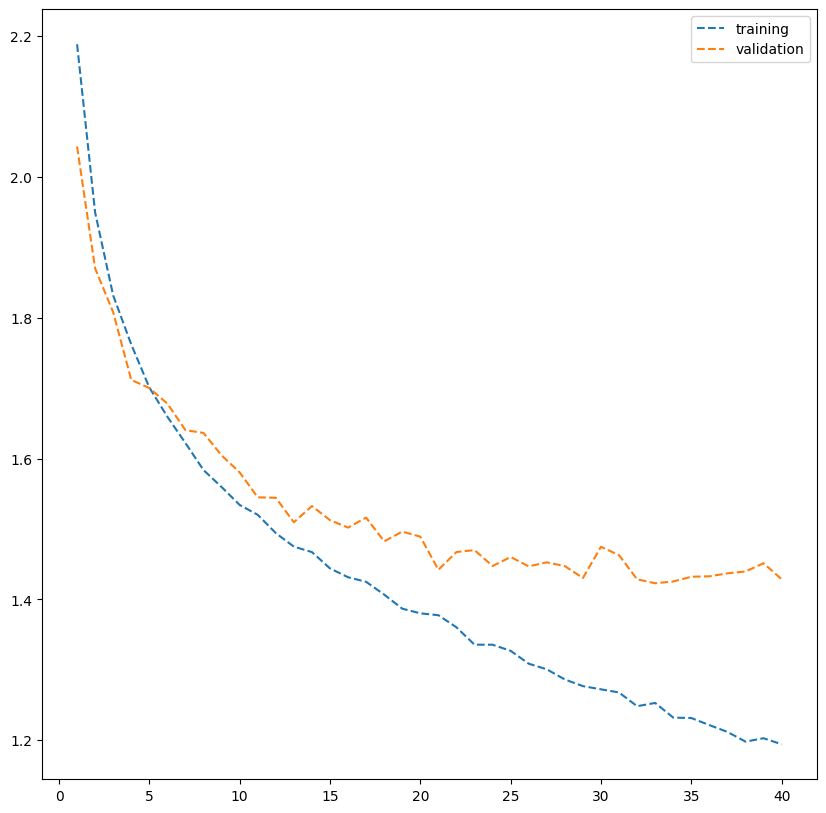

In [ ]:
# loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, '--', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

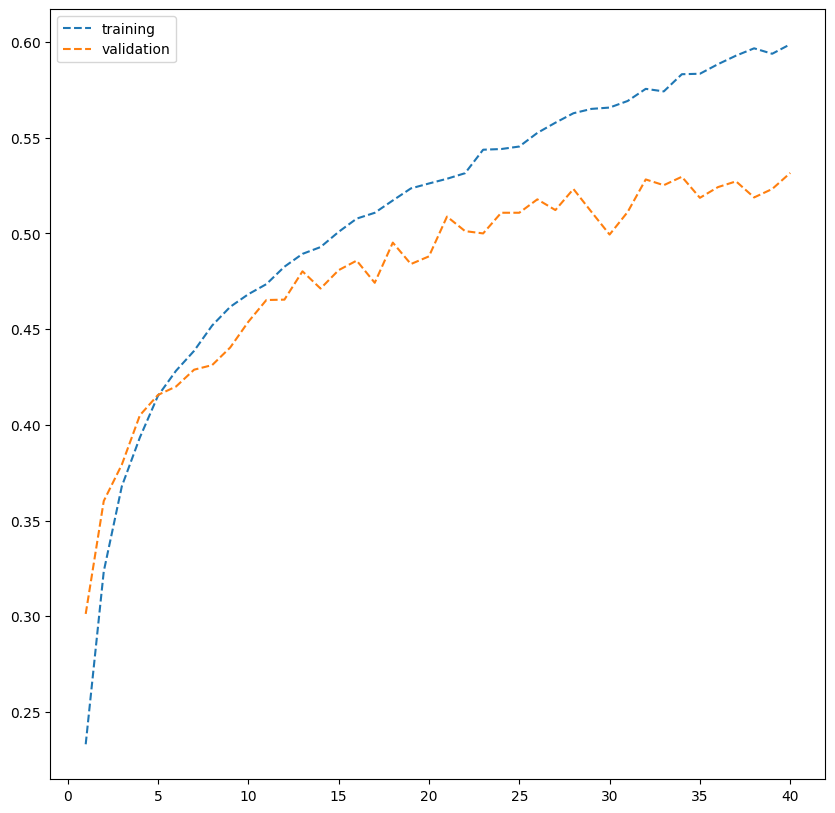

In [ ]:
# accuracy
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(accuracy)+1)
plt.plot(epoch, accuracy, '--', label = 'training')
plt.plot(epoch, val_accuracy, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4340 - accuracy: 0.5218


[1.433989405632019, 0.5217999815940857]

PREDICCIONES

In [ ]:
# Haciendo predicciones
y_predict = model.predict(x_test)

# Convirtiendo las predicciones en un label (tomando el valor máximo de predicción)
y_predict_classes = np.argmax(y_predict, axis=1)

313/313 [==============================] - 2s 5ms/step


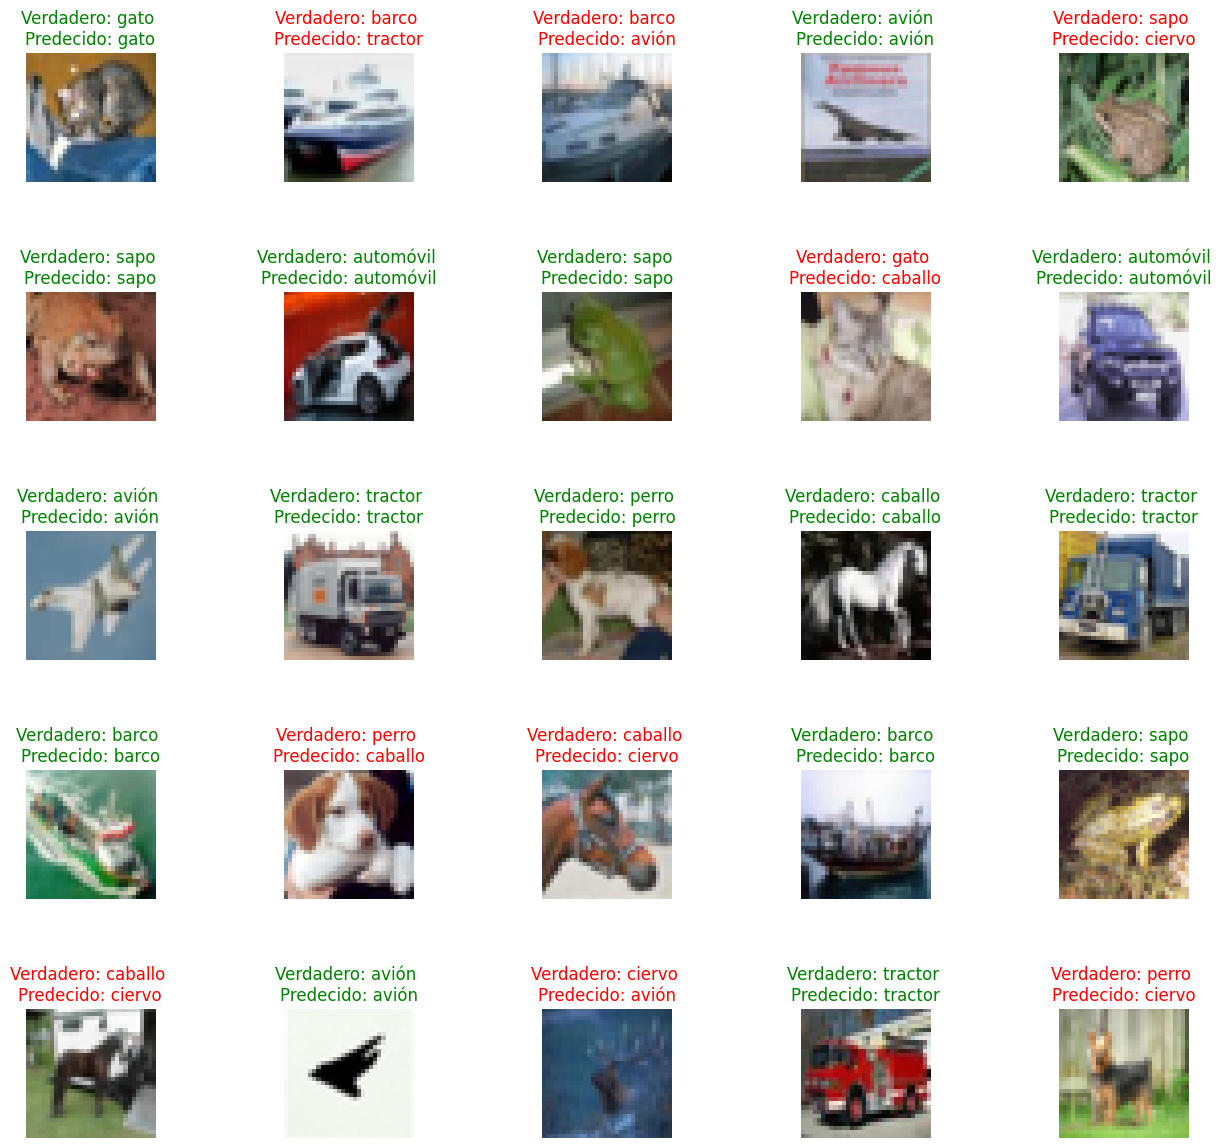

In [ ]:
# Graficando Clase real vs. Clase predecidas

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_data[i])
    title_color = "green" if np.argmax(y_test[i]) == y_predict_classes[i] else "red"
    axes[i].set_title("Verdadero: %s \nPredecido: %s" % (class_names[np.argmax(y_test[i])], class_names[y_predict_classes[i]]), color=title_color)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)